# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
if not os.path.exists("lut.py"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
import lut

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

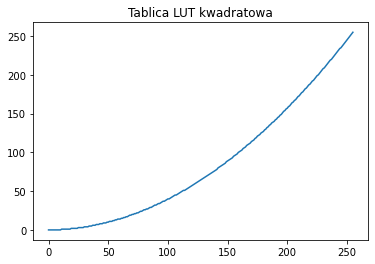

In [3]:
plt.plot(lut.kwadratowa)
plt.title("Tablica LUT kwadratowa")
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

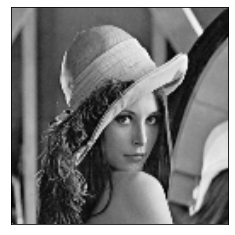

In [4]:
if not os.path.exists("lena.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
lena = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
plt.gray()
plt.imshow(lena)
plt.xticks([])
plt.yticks([])
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

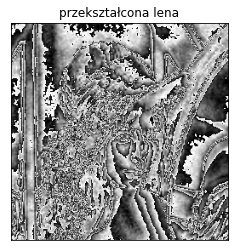

In [5]:
plt.imshow(cv2.LUT(lena,lut.pila))
plt.xticks([])
plt.yticks([])
plt.title("przekształcona lena")
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [6]:
def LUT(img, lutable):
    lut_img = cv2.LUT(img, lutable)
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    ax1.plot(lutable)
    ax1.set_title('LUT')
    ax2.imshow(img)
    ax3.set_title('LUT_image')
    ax2.set_title('orginal_image')
    ax1.set_aspect('equal')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax3.imshow(lut_img)
    ax3.set_xticks([])
    ax3.set_yticks([])
    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

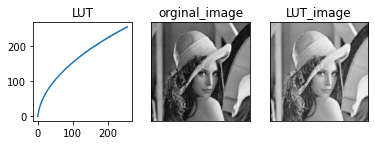

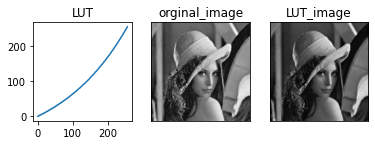

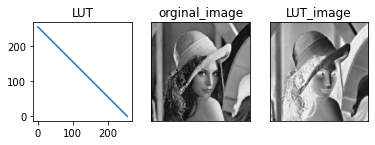

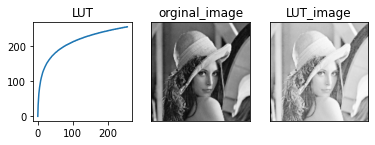

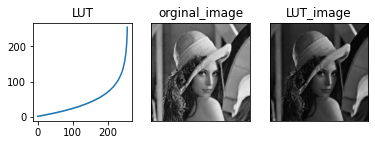

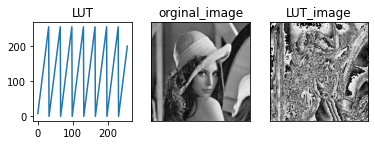

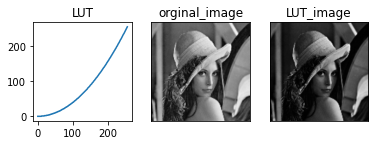

In [7]:
lst = [lut.pierwiastkowa,lut.wykladnicza,lut.odwrotna,lut.log,lut.odwlog,lut.pila,lut.kwadratowa]
for i in lst:
    LUT(lena,i)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

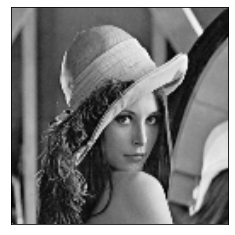

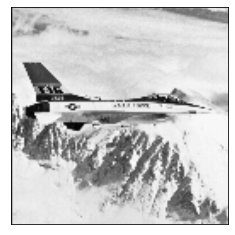

In [8]:
if not os.path.exists("lena.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
if not os.path.exists("jet.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp
lena = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
jet = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)
plt.imshow(lena)
plt.gray()
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(jet)
plt.gray()
plt.xticks([]), plt.yticks([])
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

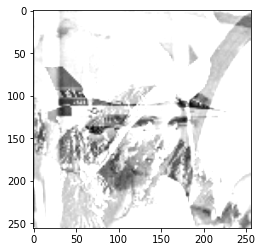

In [9]:
add_lena_jet = cv2.add(lena,jet)
plt.imshow(add_lena_jet)
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

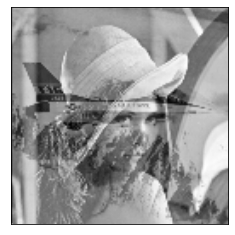

In [10]:
add_lena_jet = cv2.add(lena.astype('uint16'),jet.astype('uint16'))
cv2.normalize(add_lena_jet,add_lena_jet, 0, 255, cv2.NORM_MINMAX)
plt.imshow(add_lena_jet.astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

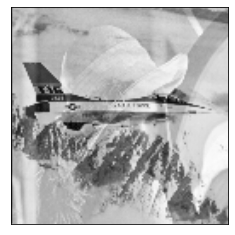

In [11]:
add_lena_jet = cv2.addWeighted(lena.astype('uint16'), 2, jet.astype('uint16'), 6, 0.0)
cv2.normalize(add_lena_jet,add_lena_jet, 0, 255, cv2.NORM_MINMAX)
plt.imshow(add_lena_jet.astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

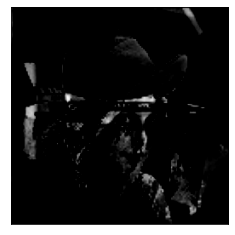

In [12]:
sub_lena_jet = cv2.subtract(lena.astype('uint16'),jet.astype('uint16'))
cv2.normalize(sub_lena_jet,add_lena_jet, 0, 255, cv2.NORM_MINMAX)
plt.imshow(sub_lena_jet.astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

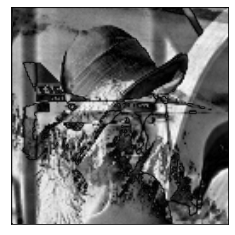

In [13]:
sub_lena_jet = cv2.subtract(lena.astype('int16'),jet.astype('int16'))
plt.imshow(abs(sub_lena_jet))
plt.xticks([])
plt.yticks([])
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

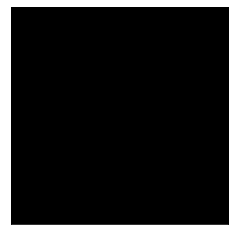

In [14]:
add_lena_jet = cv2.multiply(lena,jet)
plt.imshow(add_lena_jet)
plt.xticks([])
plt.yticks([])
plt.show()

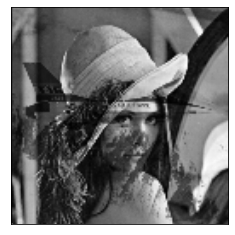

In [15]:
add_lena_jet = cv2.multiply(lena.astype('uint16'),jet.astype('uint16'))
cv2.normalize(add_lena_jet,add_lena_jet, 0, 255, cv2.NORM_MINMAX)
plt.imshow(add_lena_jet.astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.show()

wynik mnożenia obrazów bez normalizacji nie niesie ze sobą informacji gdyż wartości nie znajdują się całkowicie w zakresie 0 - 255 więc warości są "ucinane" przez co tracona jest praktycznie cała informacja o bitach obrazu. Przy zastosowaniu normalizacji mnożenie obrazów uwypukla elementy które są jaśniejsze lub ciemniejsze na obydwóch obrazach przez co wizualnie widoczne są kontury jednego i drugiego obrazu.

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

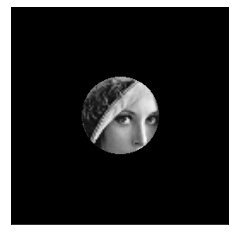

In [16]:
if not os.path.exists("kolo.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
kolo = cv2.imread("kolo.bmp", cv2.IMREAD_GRAYSCALE)
kolo = kolo.astype('bool').astype('uint8')
koloxlena = cv2.multiply(kolo,lena)
plt.imshow(koloxlena)
plt.xticks([])
plt.yticks([])
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

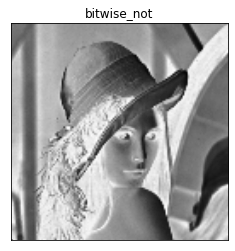

In [17]:
plt.imshow(cv2.bitwise_not(lena))
plt.xticks([])
plt.yticks([])
plt.title("bitwise_not")
plt.show()

#plt.imshow(cv2.LUT(lena, lut.odwrotna))
#plt.title("lut.odwrotna")
#plt.xticks([])
#plt.yticks([])
#plt.show()


## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

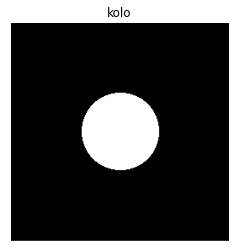

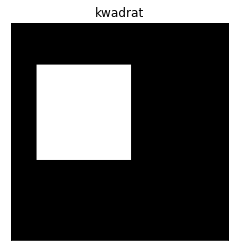

In [18]:
if not os.path.exists("kwadrat.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp
kwadrat = cv2.imread("kwadrat.bmp", cv2.IMREAD_GRAYSCALE)
if not os.path.exists("kolo.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
kolo = cv2.imread("kolo.bmp", cv2.IMREAD_GRAYSCALE)
plt.imshow(kolo)
plt.title("kolo")
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(kwadrat)
plt.title("kwadrat")
plt.xticks([])
plt.yticks([])
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

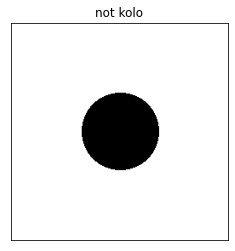

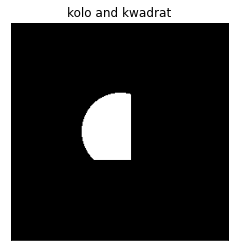

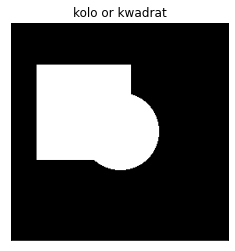

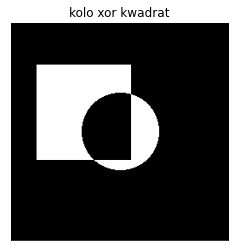

In [19]:
plt.imshow(~kolo)
plt.title("not kolo")
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(kolo & kwadrat)
plt.title("kolo and kwadrat")
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(kolo | kwadrat)
plt.title("kolo or kwadrat")
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(kolo ^ kwadrat)
plt.title("kolo xor kwadrat")
plt.xticks([])
plt.yticks([])
plt.show()